In [1]:
from knowknow import *

In [2]:
dataset_metadata

{'sociology-wos-74b': {'RELIABLE_DATA_STARTS_HERE': 1900,
  'RELIABLE_DATA_ENDS_HERE': 2015,
  'type': 'wos',
  'doi': '10.7910/DVN/GQGJLQ',
  'name': 'sociology-wos-74b'}}

In [41]:
db1 = Dataset('sociology-wos-74a') # yet to be uploaded -- sorry!

loading variable sociology-wos-74a/groups from disk
loading variable sociology-wos-74a/group_reps from disk


In [4]:
db = Dataset('10.7910/DVN/GQGJLQ') #sociology-wos-73b

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk


In [2]:
dball = Dataset('sociology-wos-all')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk
loading variable sociology-wos-all/groups from disk
loading variable sociology-wos-all/_attributes from disk


In [3]:
db2 = Dataset('sociology-wos-74a')

loading variable sociology-wos-74a/groups from disk
loading variable sociology-wos-74a/group_reps from disk
loading variable sociology-wos-74a/_attributes from disk


In [4]:
db2(c='Portes, A.|1998|annu rev sociol,v22,p1').cits

loading variable sociology-wos-74a/ind ___ c from disk


0

In [5]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
db2.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
dball.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)

# more uncategorized analysis

In [6]:
cc_full = db2.by('c').docs

loading variable sociology-wos-74a/doc ___ c from disk


In [7]:
cc = db.by('c').cits

loading variable sociology-wos-74b/ind ___ c from disk


In [27]:
num1 = sum([1 for x,c in cc_full.items() if c == 1])
num2 = sum([1 for x,c in cc_full.items() if c in [2,3,4]])
num3 = sum([1 for x,c in cc_full.items() if c >= 5])

total = sum([1 for x,c in cc_full.items() if c >= 1])
total2 = sum(db2.by('fy').docs.values())
total3 = len(db2.items('fj'))
total4 = sum([c for x,c in cc_full.items() if c >= 1])

c1 = num1/total
c2 = num2/total
c3 = num3/total

In [28]:
total,total2,total3,total4

(1699615, 93648, 73, 3721890)

In [9]:
c4 = sum([c for x,c in cc_full.items() if c >= 5]) / sum(cc_full.values())

In [10]:
num5 = sum([1 for x,c in cc.items() if c > 1])

In [11]:
sum( db2.by('fj').cits.values() )

3747909

In [12]:
min(cc.values())

5

In [13]:
sum( db.by('fj').cits.values() )

loading variable sociology-wos-74b/ind ___ fj from disk


1502423

In [31]:
first = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
last = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

In [34]:
display(Markdown(f"""

Within the {len(db.by('fj').cits)} sociology journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from {total2:,} articles published between {first} and {last}, 
    {total4 / 1e6:0.1f}M citations in all. 
Of the {total / 1e6:0.1f}M distinct cited works cited in these articles, 
    {c1:.0%} received only a single citation, 
    {c2:.0%} received between 2 and 4 citations, 
    and {c3:.0%} received at least 5 citations. 
However, {c4:.0%} of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 
"""))



Within the 73 sociology journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from 93,648 articles published between 1900 and 2020, 
    3.7M citations in all. 
Of the 1.7M distinct cited works cited in these articles, 
    75% received only a single citation, 
    18% received between 2 and 4 citations, 
    and 7% received at least 5 citations. 
However, 45% of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 


In [35]:
#display(Markdown("""
"""
Of the {total:,} distinct cited works cited in {total2:,} Sociology articles in the chosen {total3:,} sociology journals,
    {c1:.0%} ({num1:,}) received only a single citation,
    {c2:.0%} ({num2:,}) received between 2 and 4 citations,
    and {c3:.0%} ({num3:,}) received at least 5 citations.
{c4:.0%} of the citations are to the {c3:.0%} which receive at least 5 citations.
This is an underestimate, as typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work.
But if it's even remotely accurate, it shows that the relatively *uncited* get about as much attention as the relatively *cited*.
In this section I focus on the *cited* (discarding any works with less than 5 citations total).
This discards errors and one-offs.
Typographical errors and nonstandard spellings are excluded unless these become relatively common in this context.
And we consider only the references which have any substantive life to speak of.
The following analysis is on the {num5:,} remaining cited works.
""";
#""".format(**locals())))

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


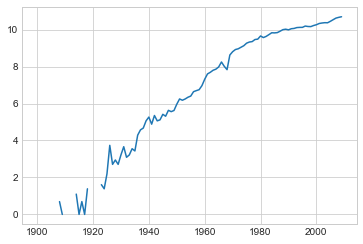

In [36]:
c = db.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

loading variable sociology-wos-all/ind ___ fy from disk


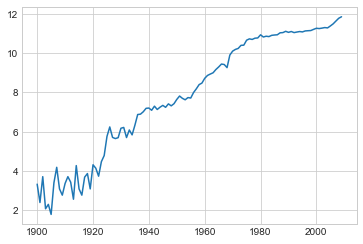

In [37]:
c = dball.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

# summary before filtering

In [45]:
min_y = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
max_y = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

In [41]:
c1 = sum( dball.by('fy').docs.values() )
c2 = len( list(dball.by('fj').docs) )
c3 = len( list(db.by('fj').docs) )

Nclim = sum( c for (j,),c in dball.by('fj').cits.items() if j in set(db.items('fj')) )
Ndlim = sum( c for (j,),c in dball.by('fj').docs.items() if j in set(db.items('fj')) )

In [42]:
citN = sum( db.by('fj').cits.values() )
citN_m = citN / 1e6
docN = sum( db.by('fj').docs.values() )

njournals = len(db.items('fj'))

wauthAve = sum( db.by('fa').docs.values() ) / docN
cauthAve = sum( db.by('ta').docs.values() ) / docN
cworkAve = sum( db.by('c').docs.values() ) / docN

loading variable sociology-wos-74b/doc ___ fa from disk
loading variable sociology-wos-74b/doc ___ ta from disk
loading variable sociology-wos-74b/doc ___ c from disk


In [43]:
cN = len(db.items('c'))
faN = len(db.items('fa'))
ffaN = len(db.items('ffa'))
taN = len(db.items('ta'))

loading variable sociology-wos-74b/ind ___ fa from disk
loading variable sociology-wos-74b/ind ___ ffa from disk
loading variable sociology-wos-74b/ind ___ ta from disk


Web of Science provides a shortened version of each cited work, which attempts to generalize over reference formats, including references made in the body of the article or in footnotes, 
    as most were before broad citation format standardization in the late 1960s and early 1970s.
Their method of shortening has changed over time, and smudges of ink or typographical errors made by authors result in inconsistencies.
I use a grouping algorithm to identify identical references and combine them. See Appendix for details.

In [47]:
display(Markdown("""
(unused)
As of April 2020, there were {c1:,} journal articles indexed by Web of Science in the category "Sociology," distributed across {c2:,} journals.
I limit my focus here to the journals which consistently publish sociology articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves {c3:,} journals, containing {Ndlim:,} articles published between {min_y} and {max_y}, and {Nclim:,} total citations.
""".format(**locals())))


(unused)
As of April 2020, there were 138,032 journal articles indexed by Web of Science in the category "Sociology," distributed across 312 journals.
I limit my focus here to the journals which consistently publish sociology articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves 73 journals, containing 93,648 articles published between 1900 and 2020, and 3,747,909 total citations.


In [48]:
display(Markdown("""
(unused) After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with {docN:,} journal articles and {citN_m:0.1f}M citations. 
Across all articles, 
    there are on average {wauthAve:0.2f} writing authors, 
        {cauthAve:0.2f} cited authors, 
        and {cworkAve:0.2f} cited works. 
In total there were 
    {cN:,} cited works, 
    {taN:,} cited authors, and 
    {faN:,} writing authors 
    ({ffaN:,} first authors). 
""".format(**locals())))


After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with 87,820 journal articles and 1.5M citations. 
Across all articles, 
    there are on average 1.73 writing authors, 
        14.52 cited authors, 
        and 16.92 cited works. 
In total there were 
    83,626 cited works, 
    28,742 cited authors, and 
    62,199 writing authors 
    (39,858 first authors). 


In [49]:
np.sum(list(db.by('fy').docs.values()))

loading variable sociology-wos-74b/doc ___ fy from disk


87820

In [18]:
int(np.ceil(3.5))

4

In [50]:
c = db.by('fj').cits
d = db.by('fj').docs
print( max(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)]) )
print( min(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)]) )

sociological theory
society


In [52]:
st_ave = db(fj='sociological theory').cits / db(fj='sociological theory').docs
soc_ave = db(fj='society').cits / db(fj='society').docs

In [53]:
top5 = sorted( db.items('fj'), key=lambda x: -db(fj=x).cits )[:5]

In [54]:
top5str = ["*{}* ({})".format(x.title(), db(fj=x).cits) for x in top5]
top5str = ", ".join(top5str[:-1]) + ", and " + top5str[-1]
top5prop = sum( db(fj=x).cits for x in top5 ) / sum( db(fj=x).cits for x in db.items('fj') )
top5propd = sum( db(fj=x).docs for x in top5 ) / sum( db(fj=x).docs for x in db.items('fj') )

In [55]:
display(Markdown("""
Sociological Theory produces the most citations per article, at {st_ave:0.1f}. 
Meanwhile Society produces just {soc_ave:0.1f} citations per article. 
Society’s format does not beg for citations at all, 
    while papers published in Sociological Theory are often an extended “theoretical motivation” section.
Web of Science provides the most citations for the journals {top5str}. 
Together these five journals comprise {top5prop:0.0%} of all citations ({top5propd:0.0%} of documents) in this dataset.
""".format(**locals())))


Sociological Theory produces the most citations per article, at 36.9. 
Meanwhile Society produces just 3.4 citations per article. 
Society’s format does not beg for citations at all, 
    while papers published in Sociological Theory are often an extended “theoretical motivation” section.
Web of Science provides the most citations for the journals *Social Forces* (83526), *American Sociological Review* (77147), *American Journal Of Sociology* (61449), *Social Indicators Research* (59533), and *Social Science Research* (55068). 
Together these five journals comprise 22% of all citations (18% of documents) in this dataset.


In [22]:
st = sorted( db2.items('fj'), key=lambda x: -db(fj=x).docs )
st = [x for x in st if x not in {'sociologia'}]
top_N = st[0]
top_Ny = db2(fj=top_N, fy=2015).docs
bot_N = st[-1]
bot_Ny = db2(fj=bot_N, fy=2015).docs

In [23]:
display(Markdown(f"*{top_N.title()}* published {top_Ny} papers in 2015, while *{bot_N.title()}* published just {bot_Ny}"))

*Social Indicators Research* published 243 papers in 2015, while *Sociological Theory* published just 15

In [56]:
d50 = sum( db(fy=YY).docs for YY in range(1950,1960) )
c50 = sum( db(fy=YY).cits for YY in range(1950,1960) )
cd50 = c50/d50
j50 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(1950,1960) ))


d00 = sum( db(fy=YY).docs for YY in range(2000,2010) )
c00 = sum( db(fy=YY).cits for YY in range(2000,2010) )
cd00 = c00/d00
j00 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(2000,2010) ))

d2019 = db(fy=2019).docs

loading variable sociology-wos-74b/ind ___ fj.fy from disk


In [57]:
display(Markdown("""
(unused) Only {d50:,} articles were published in {j50:,} journals from 1950-1959 ({cd50:0.1f} citations per article),
    compared to {d00:,} articles in {j00:,} journals from 2000-2009 ({cd00:0.1f} citations per article).
In 2019 alone there were {d2019:,} articles published.
""".format(**locals())))


Only 1,630 articles were published in 10 journals from 1950-1959 (4.0 citations per article),
    compared to 17,570 articles in 73 journals from 2000-2009 (20.2 citations per article).
In 2019 alone there were 3,338 articles published.


# citing authors

In [58]:
fc = db.by('fa').docs

num1 = len(db.items('fa'))
num2 = len([_ for (a,),c in fc.items() if c == 1])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+". "+x[0]).title() + " (%s)"%c
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [59]:
len([y for y in fc.values() if y>20])

551

In [60]:
num3 = len([_ for (a,),c in fc.items() if c >20])
num4 = len([_ for (a,),c in fc.items() if c >40])

In [61]:
display(Markdown("""
Of the {num1:,} authors who published in this context, {num2:,} only published a single time ({p2:0.0%}).
{num3:,} authors have published more than 20 papers, and just {num4:,} published more than 40.
The top ten publishing first authors are {an}.
It is no accident that "Smith" shows up regularly in this list, a reminder that author names are not disambiguated.
""".format(**locals())))


Of the 62,199 authors who published in this context, 38,335 only published a single time (62%).
551 authors have published more than 20 papers, and just 92 published more than 40.
The top ten publishing first authors are D. Smith (90), J. Hagan (87), M. Smith (86), J. Smith (86), C. Ellison (83), C. Smith (82), J. Williams (76), D. Massey (73), J. Martin (73) and J. Wilson (71).
It is no accident that "Smith" shows up regularly in this list, a reminder that author names are not disambiguated.


(array([5.987e+04, 1.648e+03, 4.140e+02, 1.500e+02, 5.800e+01, 2.500e+01,
        1.900e+01, 6.000e+00, 3.000e+00, 6.000e+00]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <a list of 10 Patch objects>)

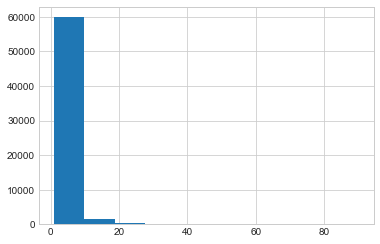

In [62]:
plt.hist(fc.values())

# cited authors

In [63]:
fc = db.by('ta').docs

num1 = len(db.items('ta'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:20]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+" "+x[0]).title() + " (%s citations)"%c
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [64]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [65]:
display(Markdown("""
I have already filtered cited works with less than five citations, so all {num1:,} cited authors in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top authors cited in this dataset were {an}.
""".format(**locals())))


I have already filtered cited works with less than five citations, so all 28,742 cited authors in this dataset have at least five citations.
Of these, 3,105 (11%) were cited less than 10 times, 2,590 (9%) were cited at least 100 times and 75 were cited at least 1000 times in this dataset.
The top authors cited in this dataset were P. Bourdieu (5523 citations), E. Goffman (4835 citations), M. Weber (4420 citations), J. Coleman (3725 citations), E. Durkheim (3594 citations), A. Giddens (3466 citations), T. Parsons (3346 citations), R. Merton (3338 citations), P. Blau (3224 citations), M. Foucault (3154 citations), G. Becker (2515 citations), P. Berger (2339 citations), H. Becker (2280 citations), A. Portes (2246 citations), M. Granovetter (2186 citations), R. Putnam (2145 citations), D. Massey (2058 citations), C. Mills (1932 citations), O. Duncan (1906 citations) and P. Dimaggio (1865 citations).


# cited works

In [66]:
fc = db.by('c').docs

num1 = len(db.items('c'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split("|")
    if len(x)==2:
        a,w = x
        #return ("%s (??)"%a).title() + " (%s citations)"%c
    elif len(x)==3:
        a,y,w = x
        #return ("%s (%s)"%(a,y)).title() + " (%s citations)"%c
    print (a, "-", w)
    a = a.split(",")[0]
    a = a.title()
    a = a+"'s"
    
    w = w.title()
    return ("%s %s (%s)"%(a,w,c))
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

Weber, M. - ec soc
Bourdieu, P. - distinction social c
Merton, R. - social theory social
Goffman, E. - presentation self ev
Glaser, B. - discovery grounded t
Putnam, R. - bowling alone collap
Blau, P. - am occupational stru
Durkheim, E. - division labor soc
Berger, P. - social construction
Goffman, E. - stigma notes managem


In [67]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [68]:
display(Markdown("""
All {num1:,} cited works in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top cited works in this dataset were {an}.
""".format(**locals())))


All 83,626 cited works in this dataset have at least five citations.
Of these, 11,060 (13%) were cited less than 10 times, 1,424 (2%) were cited at least 100 times and 18 were cited at least 1000 times in this dataset.
The top cited works in this dataset were Weber's Ec Soc (2342), Bourdieu's Distinction Social C (2188), Merton's Social Theory Social (1799), Goffman's Presentation Self Ev (1708), Glaser's Discovery Grounded T (1423), Putnam's Bowling Alone Collap (1331), Blau's Am Occupational Stru (1269), Durkheim's Division Labor Soc (1234), Berger's Social Construction (1214) and Goffman's Stigma Notes Managem (1174).
